## TASK:

Load the MNIST dataset (introduced in Chapter 3) and split it into a
training set and a test set (take the first 60,000 instances for training,
and the remaining 10,000 for testing). Train a random forest classifier
on the dataset and time how long it takes, then evaluate the resulting
model on the test set. Next, use PCA to reduce the dataset’s
dimensionality, with an explained variance ratio of 95%. Train a new
random forest classifier on the reduced dataset and see how long it
takes. Was training much faster? Next, evaluate the classifier on the
test set. How does it compare to the previous classifier? Try again with
an SGDClassifier. How much does PCA help now?


In [3]:
from sklearn.datasets import fetch_openml
import pandas as pd

mnist = fetch_openml('mnist_784', as_frame=False, parser="auto")
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

In [3]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state=42)
start = time.time()
model.fit(X_train, y_train)
end = time.time()
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Training time: {end - start:.2f} seconds")
print(f"Accuracy: {accuracy:.2f}")

Training time: 38.27 seconds
Accuracy: 0.97


In [4]:
import time
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

pca = PCA(random_state=42, n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


model2 = RandomForestClassifier(random_state=42)
start = time.time()
model.fit(X_train_pca, y_train)
end = time.time()
y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Training time: {end - start:.2f} seconds")
print(f"Accuracy: {accuracy:.2f}")

Training time: 116.66 seconds
Accuracy: 0.95


In [5]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(random_state=42)
start = time.time()
model.fit(X_train, y_train)
end = time.time()
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Training time: {end - start:.2f} seconds")
print(f"Accuracy: {accuracy:.2f}")

Training time: 108.43 seconds
Accuracy: 0.87


In [6]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42, n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


model2 = SGDClassifier(random_state=42)
start = time.time()
model.fit(X_train_pca, y_train)
end = time.time()
y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Training time: {end - start:.2f} seconds")
print(f"Accuracy: {accuracy:.2f}")

Training time: 21.81 seconds
Accuracy: 0.90


In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)

X_tsne = tsne.fit_transform(mnist.data[:5000])

c:\Users\yardz\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\yardz\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\yardz\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yardz\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

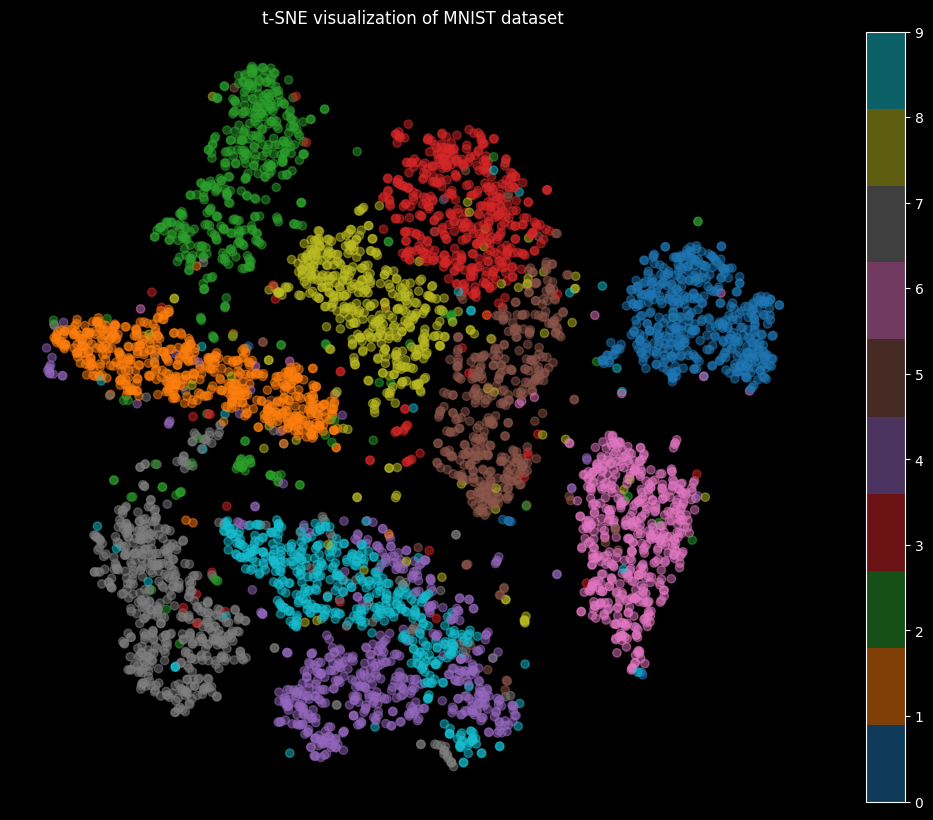

In [29]:
from matplotlib import pyplot as plt
import numpy as np

plt.style.use('dark_background')
plt.figure(figsize=(13, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=mnist.target[:5000].astype(np.int8), cmap="tab10", alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.title("t-SNE visualization of MNIST dataset")
plt.show()